# Graph Building
(Work in progress...)

In [1]:
import numpy as np
import pandas as pd
import utm
import dgl
import networkx as nx
import torch

Using backend: pytorch


In [2]:
def to_utm(x):
    return utm.from_latlon(x[0], x[1])

In [3]:
df = pd.read_csv('../data/data_initial_preprocessing.csv')
df.shape

(843915, 12)

In [4]:
df

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error
0,SN18700,59.9423,10.7200,2019,5,13,12,12.47900,11.25000,11.1,0,0.15000
1,SN80740,66.9035,13.6460,2019,5,13,12,4.09424,6.15000,6.0,0,0.15000
2,SN61630,62.2583,8.2000,2019,5,13,12,1.81200,4.45000,4.3,0,0.15000
3,SN8140,61.4255,11.0803,2019,5,13,12,8.86768,9.65000,9.5,0,0.15000
4,SN23500,61.1220,9.0630,2019,5,13,12,7.61084,9.65860,8.6,0,1.05860
...,...,...,...,...,...,...,...,...,...,...,...,...
843910,SN61580,62.2943,8.1255,2019,5,13,18,2.25586,5.17270,5.8,0,0.62730
843911,SN24670,60.2684,9.6919,2019,5,13,18,9.25342,11.92026,11.0,0,0.92026
843912,SN90490,69.6767,18.9133,2019,5,13,18,3.75146,3.25000,3.1,0,0.15000
843913,SN77490,65.3143,13.4483,2019,5,13,18,-0.56055,-2.15744,-2.6,0,0.44256


In [5]:
stations = df.copy()
stations.drop_duplicates(subset=['station_id'], inplace=True)
stations.shape

(667, 12)

In [6]:
stations

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error
0,SN18700,59.94230,10.72000,2019,5,13,12,12.479000,11.25000,11.1,0,0.15000
1,SN80740,66.90350,13.64600,2019,5,13,12,4.094240,6.15000,6.0,0,0.15000
2,SN61630,62.25830,8.20000,2019,5,13,12,1.812000,4.45000,4.3,0,0.15000
3,SN8140,61.42550,11.08030,2019,5,13,12,8.867680,9.65000,9.5,0,0.15000
4,SN23500,61.12200,9.06300,2019,5,13,12,7.610840,9.65860,8.6,0,1.05860
...,...,...,...,...,...,...,...,...,...,...,...,...
324578,SN30244,59.07270,9.92300,2019,10,29,18,0.979500,2.56567,0.7,0,1.86567
325893,SN25541,60.68108,8.00375,2019,10,29,0,-6.306150,-3.95193,-4.5,0,0.54807
388852,SN54815,61.27470,8.13850,2019,11,30,18,-8.348236,-7.62027,-8.0,0,0.37973
556356,SN30428,59.18550,9.54030,2019,1,22,6,-8.286380,-5.60867,-6.0,0,0.39133


In [7]:
stations['utm'] = stations[['lat', 'long']].apply(lambda x: to_utm(x), axis=1)

In [8]:
stations['utm_x'] = stations['utm'].apply(lambda x: x[0])
stations['utm_y'] = stations['utm'].apply(lambda x: x[1])

In [9]:
stations

,station_id,lat,long,year,month,day,hour,forecast,gridpp,observation,observation_quality,gridpp_error,utm,utm_x,utm_y
0,SN18700,59.94230,10.72000,2019,5,13,12,12.479000,11.25000,11.1,0,0.15000,"(596097.435011151, 6646233.876457353, 32, V)",596097.435011,6.646234e+06
1,SN80740,66.90350,13.64600,2019,5,13,12,4.094240,6.15000,6.0,0,0.15000,"(440732.20032325835, 7421266.829027383, 33, W)",440732.200323,7.421267e+06
2,SN61630,62.25830,8.20000,2019,5,13,12,1.812000,4.45000,4.3,0,0.15000,"(458454.11108216754, 6903212.279337059, 32, V)",458454.111082,6.903212e+06
3,SN8140,61.42550,11.08030,2019,5,13,12,8.867680,9.65000,9.5,0,0.15000,"(610993.369200744, 6811952.803180132, 32, V)",610993.369201,6.811953e+06
4,SN23500,61.12200,9.06300,2019,5,13,12,7.610840,9.65860,8.6,0,1.05860,"(503394.33104674995, 6776378.0222047465, 32, V)",503394.331047,6.776378e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324578,SN30244,59.07270,9.92300,2019,10,29,18,0.979500,2.56567,0.7,0,1.86567,"(552915.5778018576, 6548512.881481115, 32, V)",552915.577802,6.548513e+06
325893,SN25541,60.68108,8.00375,2019,10,29,0,-6.306150,-3.95193,-4.5,0,0.54807,"(445579.0407999647, 6727677.984216568, 32, V)",445579.040800,6.727678e+06
388852,SN54815,61.27470,8.13850,2019,11,30,18,-8.348236,-7.62027,-8.0,0,0.37973,"(453808.909393533, 6793689.8468205035, 32, V)",453808.909394,6.793690e+06
556356,SN30428,59.18550,9.54030,2019,1,22,6,-8.286380,-5.60867,-6.0,0,0.39133,"(530874.1403040809, 6560832.869152451, 32, V)",530874.140304,6.560833e+06


In [10]:
x = np.array(stations.utm_x)
y = np.array(stations.utm_y)

In [11]:
x.shape

(667,)

In [12]:
%%time

distances = np.ndarray(shape=(x.shape[0] - 1, x.shape[0]))

for i in range(x.shape[0] - 1):
    next_x = np.concatenate((x[i+1:], x[:i+1]), axis=None)
    next_y = np.concatenate((y[i+1:], y[:i+1]), axis=None)

    diff_x = x - next_x
    diff_y = y - next_y

    diff_x_square = diff_x**2
    diff_y_square = diff_y**2

    sum_square = diff_x_square + diff_y_square

    distances[i] = np.sqrt(sum_square)

CPU times: user 17.2 ms, sys: 158 µs, total: 17.3 ms
Wall time: 15.6 ms


In [13]:
distances = distances.transpose()
distances.argsort()[:, :5]

array([[177, 215, 576, 133, 484],
       [579, 657, 244,  45,  20],
       [625, 314, 564, 196, 305],
       ...,
       [179, 265, 506, 228, 233],
       [146, 516,  65, 294, 427],
       [371,  15, 542, 113, 298]])

In [14]:
print(distances[0,177])
print(distances[0,215])
print(distances[0,576])

print('-'*20)

print(distances[1,579])
print(distances[1,657])
print(distances[1,244])

3207.079200729402
3510.8581129298104
3573.3656167363115
--------------------
2627.1202886985902
14043.75675569658
15719.658541234314


In [15]:
distances.argsort()[:, :5]

array([[177, 215, 576, 133, 484],
       [579, 657, 244,  45,  20],
       [625, 314, 564, 196, 305],
       ...,
       [179, 265, 506, 228, 233],
       [146, 516,  65, 294, 427],
       [371,  15, 542, 113, 298]])

In [16]:
i = 0
src = []
dst = []
weight = []
for r in distances.argsort()[:, :5]:
    for value in r:
        src.append(i)
        dst.append(value)
        weight.append(distances[i, value]/1000)


    i += 1

In [17]:
to_df = {
    'src': src,
    'dst': dst,
    'weight': weight
}

In [18]:
pd.DataFrame(to_df)

,src,dst,weight
0,0,177,3.207079
1,0,215,3.510858
2,0,576,3.573366
3,0,133,4.361238
4,0,484,4.673445
...,...,...,...
3330,666,371,2.456148
3331,666,15,2.578604
3332,666,542,3.745481
3333,666,113,4.071617


Para trazer o conteudo acho que vai ser necessário agrupar todos os dados de cada estação. Vendo a documentação fazer parecer que o caminho vai ser agrupar como vetores multidimensionais. <br><br>Provavel shape <strong>(quantidade de nodes, quantidade de features por entrada, quantidade de entradas por estação)</strong>

Faltaria conferir se existem rows iguais que só trocam src com dst

In [19]:
stations_dict = stations[['station_id']].reset_index(drop=True).to_dict()['station_id']

In [20]:
new_dict = dict([(value, key) for key, value in stations_dict.items()])

In [21]:
df['node'] = df.station_id.apply(lambda x: new_dict[x])

In [22]:
df.columns

Index(['station_id', 'lat', 'long', 'year', 'month', 'day', 'hour', 'forecast',
       'gridpp', 'observation', 'observation_quality', 'gridpp_error', 'node'],
      dtype='object')

In [23]:
df.groupby(['node']).count()['station_id']

node
0      1392
1      1392
2      1381
3      1387
4      1383
       ... 
662      37
663     223
664     469
665      74
666       1
Name: station_id, Length: 667, dtype: int64

In [25]:
features_columns = ['lat', 'long', 'year', 'month', 'day', 'hour', 'forecast',
       'gridpp']

In [26]:
df[features_columns].to_numpy()

array([[ 5.99423e+01,  1.07200e+01,  2.01900e+03, ...,  1.20000e+01,
         1.24790e+01,  1.12500e+01],
       [ 6.69035e+01,  1.36460e+01,  2.01900e+03, ...,  1.20000e+01,
         4.09424e+00,  6.15000e+00],
       [ 6.22583e+01,  8.20000e+00,  2.01900e+03, ...,  1.20000e+01,
         1.81200e+00,  4.45000e+00],
       ...,
       [ 6.96767e+01,  1.89133e+01,  2.01900e+03, ...,  1.80000e+01,
         3.75146e+00,  3.25000e+00],
       [ 6.53143e+01,  1.34483e+01,  2.01900e+03, ...,  1.80000e+01,
        -5.60550e-01, -2.15744e+00],
       [ 6.86072e+01,  1.44347e+01,  2.01900e+03, ...,  1.80000e+01,
         4.98193e+00,  5.31020e+00]])

In [27]:
np.ones(shape=(8, 8))

array([[1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1.]])

In [29]:
df[features_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843915 entries, 0 to 843914
Data columns (total 8 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   lat       843915 non-null  float64
 1   long      843915 non-null  float64
 2   year      843915 non-null  int64  
 3   month     843915 non-null  int64  
 4   day       843915 non-null  int64  
 5   hour      843915 non-null  int64  
 6   forecast  843915 non-null  float64
 7   gridpp    843915 non-null  float64
dtypes: float64(4), int64(4)
memory usage: 51.5 MB


In [43]:
# Shape = (stations qty, features, row per stations)
features = np.ndarray(shape=(x.shape[0], 1400, len(features_columns)))
node_number = 0

for node in df.node.unique():
    print(node)
    r = df[df.node == node][features_columns].to_numpy()
    to_complete = int(1400 - r.shape[0])
    print(to_complete)
    if to_complete > 700:
        times_to_repeat = 1400/r.shape[0]
    features[node] = np.concatenate((r, r[:to_complete]), axis=0)

0
8
1
8
2
19
3
13
4
17
5
11
6
189
7
246
8
8
9
12
10
127
11
11
12
152
13
71
14
240
15
600
16
148
17
14
18
71
19
41
20
79
21
20
22
7
23
12
24
70
25
163
26
8
27
7
28
8
29
11
30
39
31
8
32
24
33
81
34
14
35
17
36
18
37
115
38
78
39
14
40
7
41
120
42
89
43
147
44
418
45
371
46
34
47
10
48
312
49
79
50
236
51
12
52
9
53
10
54
10
55
8
56
130
57
120
58
11
59
8
60
7
61
11
62
79
63
624
64
102
65
50
66
31
67
25
68
17
69
7
70
23
71
81
72
83
73
8
74
82
75
21
76
18
77
187
78
584
79
14
80
16
81
7
82
472
83
13
84
10
85
7
86
22
87
17
88
268
89
77
90
8
91
50
92
8
93
197
94
77
95
10
96
11
97
212
98
136
99
14
100
12
101
28
102
71
103
28
104
9
105
76
106
9
107
214
108
326
109
133
110
225
111
41
112
32
113
21
114
473
115
69
116
18
117
115
118
10
119
110
120
121
121
148
122
476
123
553
124
53
125
552
126
83
127
80
128
8
129
76
130
92
131
8
132
152
133
159
134
111
135
76
136
10
137
15
138
155
139
9
140
73
141
67
142
76
143
9
144
101
145
15
146
71
147
9
148
104
149
802


ValueError: could not broadcast input array from shape (1196,8) into shape (1400,8)

In [54]:
np.round(1400/225)

6.0

In [55]:
1400/225

6.222222222222222

In [33]:
def create_graph_structure(edges_data):
    src = edges_data['src'].to_numpy()
    dst = edges_data['dst'].to_numpy()

    g = dgl.graph((src, dst))
    return g


def print_graph(g):
    nx_g = g.to_networkx().to_undirected()
    # Kamada-Kawaii layout usually looks pretty for arbitrary graphs
    pos = nx.kamada_kawai_layout(nx_g)
    nx.draw(nx_g, pos, with_labels=True, node_color=[[.7, .7, .7]])


In [31]:
graph = create_graph_structure(pd.DataFrame(to_df))

In [32]:
graph

Graph(num_nodes=667, num_edges=3335,
      ndata_schemes={}
      edata_schemes={})

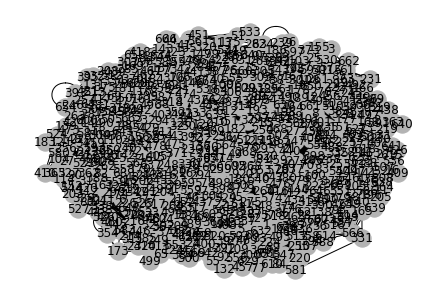

In [35]:
print_graph(graph)

In [ ]:
class WeatherDataset(dgl.data.DGLDataset):
    def __init__(self):
        super().__init__(name='weather_dataset')

    def process(self):
        nodes_data = pd.read_csv('members.csv')
        edges_data = pd.read_csv('interactions.csv')
        node_features = torch.from_numpy(nodes_data['Age'].to_numpy())
        node_labels = torch.from_numpy(nodes_data['Club'].astype('category').cat.codes.to_numpy())
        edge_features = torch.from_numpy(edges_data['Weight'].to_numpy())
        edges_src = torch.from_numpy(edges_data['Src'].to_numpy())
        edges_dst = torch.from_numpy(edges_data['Dst'].to_numpy())

        self.graph = dgl.graph((edges_src, edges_dst), num_nodes=nodes_data.shape[0])
        self.graph.ndata['feat'] = node_features
        self.graph.ndata['label'] = node_labels
        self.graph.edata['weight'] = edge_features

        # If your dataset is a node classification dataset, you will need to assign
        # masks indicating whether a node belongs to training, validation, and test set.
        n_nodes = nodes_data.shape[0]
        n_train = int(n_nodes * 0.6)
        n_val = int(n_nodes * 0.2)
        train_mask = torch.zeros(n_nodes, dtype=torch.bool)
        val_mask = torch.zeros(n_nodes, dtype=torch.bool)
        test_mask = torch.zeros(n_nodes, dtype=torch.bool)
        train_mask[:n_train] = True
        val_mask[n_train:n_train + n_val] = True
        test_mask[n_train + n_val:] = True
        self.graph.ndata['train_mask'] = train_mask
        self.graph.ndata['val_mask'] = val_mask
        self.graph.ndata['test_mask'] = test_mask

    def __getitem__(self, i):
        return self.graph

    def __len__(self):
        return 1
